# Student's Performance Dataset

# Submitted by: Mitul Nakrani

## Importing required libraries

In [372]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn import datasets, metrics, neighbors
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, SVR
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

## Load the Dataset and view details

In [373]:
math = pd.read_csv('student-mat.csv')
math

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [374]:
port = pd.read_csv('student-por.csv')
port

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [375]:
#Attributes in of Math Table and their unique values
print("Attribute\tUnique Values\n")
for i in math.columns:
    print(f"{i.ljust(11)}: {set(math[i])}")

Attribute	Unique Values

school     : {'GP', 'MS'}
sex        : {'F', 'M'}
age        : {15, 16, 17, 18, 19, 20, 21, 22}
address    : {'U', 'R'}
famsize    : {'GT3', 'LE3'}
Pstatus    : {'T', 'A'}
Medu       : {0, 1, 2, 3, 4}
Fedu       : {0, 1, 2, 3, 4}
Mjob       : {'teacher', 'at_home', 'other', 'services', 'health'}
Fjob       : {'teacher', 'at_home', 'other', 'services', 'health'}
reason     : {'other', 'reputation', 'course', 'home'}
guardian   : {'mother', 'other', 'father'}
traveltime : {1, 2, 3, 4}
studytime  : {1, 2, 3, 4}
failures   : {0, 1, 2, 3}
schoolsup  : {'yes', 'no'}
famsup     : {'no', 'yes'}
paid       : {'no', 'yes'}
activities : {'no', 'yes'}
nursery    : {'yes', 'no'}
higher     : {'yes', 'no'}
internet   : {'no', 'yes'}
romantic   : {'no', 'yes'}
famrel     : {1, 2, 3, 4, 5}
freetime   : {1, 2, 3, 4, 5}
goout      : {1, 2, 3, 4, 5}
Dalc       : {1, 2, 3, 4, 5}
Walc       : {1, 2, 3, 4, 5}
health     : {1, 2, 3, 4, 5}
absences   : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1

In [376]:
#Attributes in of Math Table and their unique values
print("Attribute\tUnique Values\n")
for i in port.columns:
    print(f"{i.ljust(11)}: {set(port[i])}")

Attribute	Unique Values

school     : {'GP', 'MS'}
sex        : {'F', 'M'}
age        : {15, 16, 17, 18, 19, 20, 21, 22}
address    : {'U', 'R'}
famsize    : {'GT3', 'LE3'}
Pstatus    : {'T', 'A'}
Medu       : {0, 1, 2, 3, 4}
Fedu       : {0, 1, 2, 3, 4}
Mjob       : {'teacher', 'at_home', 'other', 'services', 'health'}
Fjob       : {'teacher', 'at_home', 'other', 'services', 'health'}
reason     : {'other', 'reputation', 'course', 'home'}
guardian   : {'mother', 'other', 'father'}
traveltime : {1, 2, 3, 4}
studytime  : {1, 2, 3, 4}
failures   : {0, 1, 2, 3}
schoolsup  : {'yes', 'no'}
famsup     : {'no', 'yes'}
paid       : {'no', 'yes'}
activities : {'no', 'yes'}
nursery    : {'yes', 'no'}
higher     : {'yes', 'no'}
internet   : {'no', 'yes'}
romantic   : {'no', 'yes'}
famrel     : {1, 2, 3, 4, 5}
freetime   : {1, 2, 3, 4, 5}
goout      : {1, 2, 3, 4, 5}
Dalc       : {1, 2, 3, 4, 5}
Walc       : {1, 2, 3, 4, 5}
health     : {1, 2, 3, 4, 5}
absences   : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1

In [377]:
math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [378]:
port.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
school        649 non-null object
sex           649 non-null object
age           649 non-null int64
address       649 non-null object
famsize       649 non-null object
Pstatus       649 non-null object
Medu          649 non-null int64
Fedu          649 non-null int64
Mjob          649 non-null object
Fjob          649 non-null object
reason        649 non-null object
guardian      649 non-null object
traveltime    649 non-null int64
studytime     649 non-null int64
failures      649 non-null int64
schoolsup     649 non-null object
famsup        649 non-null object
paid          649 non-null object
activities    649 non-null object
nursery       649 non-null object
higher        649 non-null object
internet      649 non-null object
romantic      649 non-null object
famrel        649 non-null int64
freetime      649 non-null int64
goout         649 non-null int64
Dalc          649 no

## Data Preparation

### Encoding of Object Type Attributes

In [379]:
#Using label encoder for conversion of object type attributes
l_encoder = LabelEncoder()
encoded_math = math.copy()
encoded_port = port.copy()
replace_dict = {'yes': 1, 'no':0, 'other': 0, 'at_home': 1, 'services': 2, 'health': 3, 'teacher': 4}

In [380]:
print("Object type attributes before encoding:\n")
for attr in encoded_math.head():
    if encoded_math[attr].dtype == object:
        print(f"{attr.ljust(11)}:{set(encoded_math[attr])}")

#Manually encoding for uniformity across attributes
encoded_math.iloc[:, 15:23] = encoded_math.iloc[:, 15:23].replace(replace_dict).astype('int')
encoded_math.iloc[:, 8:10] = encoded_math.iloc[:, 8:10].replace(replace_dict).astype('int')
        
print("\n\nObject type attributes after encoding:\n")
for attr in encoded_math.head():
    if encoded_math[attr].dtype == object:
        encoded_math[attr] = l_encoder.fit_transform(encoded_math[attr])
        print(f"{attr.ljust(11)}:{set(encoded_math[attr])}")

Object type attributes before encoding:

school     :{'GP', 'MS'}
sex        :{'F', 'M'}
address    :{'U', 'R'}
famsize    :{'GT3', 'LE3'}
Pstatus    :{'T', 'A'}
Mjob       :{'teacher', 'at_home', 'other', 'services', 'health'}
Fjob       :{'teacher', 'at_home', 'other', 'services', 'health'}
reason     :{'other', 'reputation', 'course', 'home'}
guardian   :{'mother', 'other', 'father'}
schoolsup  :{'yes', 'no'}
famsup     :{'no', 'yes'}
paid       :{'no', 'yes'}
activities :{'no', 'yes'}
nursery    :{'yes', 'no'}
higher     :{'yes', 'no'}
internet   :{'no', 'yes'}
romantic   :{'no', 'yes'}


Object type attributes after encoding:

school     :{0, 1}
sex        :{0, 1}
address    :{0, 1}
famsize    :{0, 1}
Pstatus    :{0, 1}
reason     :{0, 1, 2, 3}
guardian   :{0, 1, 2}


In [381]:
encoded_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null int64
sex           395 non-null int64
age           395 non-null int64
address       395 non-null int64
famsize       395 non-null int64
Pstatus       395 non-null int64
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null int64
Fjob          395 non-null int64
reason        395 non-null int64
guardian      395 non-null int64
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null int64
famsup        395 non-null int64
paid          395 non-null int64
activities    395 non-null int64
nursery       395 non-null int64
higher        395 non-null int64
internet      395 non-null int64
romantic      395 non-null int64
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 non-null int64
Walc

In [382]:
print("Object type attributes before encoding:\n")
for attr in encoded_port.head():
    if encoded_port[attr].dtype == object:
        print(f"{attr.ljust(11)}:{set(encoded_port[attr])}")

#Manually encoding for uniformity across attributes
encoded_port.iloc[:, 15:23] = encoded_port.iloc[:, 15:23].replace(replace_dict).astype('int')
encoded_port.iloc[:, 8:10] = encoded_port.iloc[:, 8:10].replace(replace_dict).astype('int')

print("\nObject type attributes after encoding:\n")
for attr in encoded_port.head():
    if encoded_port[attr].dtype == object:
        encoded_port[attr] = l_encoder.fit_transform(encoded_port[attr])
        print(f"{attr.ljust(11)}:{set(encoded_port[attr])}")

Object type attributes before encoding:

school     :{'GP', 'MS'}
sex        :{'F', 'M'}
address    :{'U', 'R'}
famsize    :{'GT3', 'LE3'}
Pstatus    :{'T', 'A'}
Mjob       :{'teacher', 'at_home', 'other', 'services', 'health'}
Fjob       :{'teacher', 'at_home', 'other', 'services', 'health'}
reason     :{'other', 'reputation', 'course', 'home'}
guardian   :{'mother', 'other', 'father'}
schoolsup  :{'yes', 'no'}
famsup     :{'no', 'yes'}
paid       :{'no', 'yes'}
activities :{'no', 'yes'}
nursery    :{'yes', 'no'}
higher     :{'yes', 'no'}
internet   :{'no', 'yes'}
romantic   :{'no', 'yes'}

Object type attributes after encoding:

school     :{0, 1}
sex        :{0, 1}
address    :{0, 1}
famsize    :{0, 1}
Pstatus    :{0, 1}
reason     :{0, 1, 2, 3}
guardian   :{0, 1, 2}


### Splitting into training and testing datasets

In [383]:
X_math = encoded_math.iloc[:, :-1]
y_math = encoded_math.iloc[:, -1]
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_math, y_math, test_size = 0.2)

In [384]:
X_port = encoded_port.iloc[:, :-1]
y_port = encoded_port.iloc[:, -1]
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_port, y_port, test_size = 0.2)

# Model Training

In [385]:
#Creating dictionaries to store accuracy of each model
accuracies_math = {}
accuracies_port = {}

## Regression Techniques

## Linear Regression

### Math Data

In [386]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_m, y_train_m)

LinearRegression()

In [387]:
print("r2 score:", r2_score(y_test_m, lin_reg.predict(X_test_m)))
accuracies_math['Linear Regression'] = r2_score(y_test_m, lin_reg.predict(X_test_m))
print("Cross Validation Score:", cross_val_score(lin_reg, X_train_m, y_train_m).mean())
print("MAE:", mean_absolute_error(y_test_m, lin_reg.predict(X_test_m)))
print("MSE:", mean_squared_error(y_test_m, lin_reg.predict(X_test_m)))

r2 score: 0.8550707121742507
Cross Validation Score: 0.7922610879971848
MAE: 1.2106098352358305
MSE: 3.1132975327106074


In [388]:
print("Coeffecient of each feature for Math Dataset:\n")
linreg_math_coef = dict(zip(X_train_m.columns, lin_reg.coef_))
for col, val in zip(X_train_m.columns, lin_reg.coef_):
    print(f"{col.ljust(11)}: {val}")

Coeffecient of each feature for Math Dataset:

school     : 0.4476003360448368
sex        : 0.036438732041148926
age        : -0.21395554719862261
address    : 0.10623355563000217
famsize    : 0.11867341946626163
Pstatus    : -0.2785828348252134
Medu       : 0.218697910907277
Fedu       : -0.17280292996884355
Mjob       : -0.09571373961308456
Fjob       : -0.02098913496949162
reason     : 0.014563453314661695
guardian   : 0.09262905262060282
traveltime : 0.1379627084104398
studytime  : -0.16378534033436107
failures   : -0.07872886453861139
schoolsup  : 0.60797474624206
famsup     : 0.21041177236665876
paid       : 0.13767467600702107
activities : -0.30354146646713337
nursery    : -0.22002556311179344
higher     : 0.45261667342540984
internet   : -0.13263208984585556
romantic   : -0.22992546838405803
famrel     : 0.3179274224457971
freetime   : 0.08338613912775555
goout      : -0.00566328126282975
Dalc       : -0.1447273882913004
Walc       : 0.19873477052124286
health     : 0.082483630

### Portuguese Data

In [389]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_p, y_train_p)

LinearRegression()

In [390]:
print("r2 score:", r2_score(y_test_p, lin_reg.predict(X_test_p)))
accuracies_port["Linear Regression"] = r2_score(y_test_p, lin_reg.predict(X_test_p))
print("Cross Validation Score:", cross_val_score(lin_reg, X_train_p, y_train_p).mean())
print("MAE:", mean_absolute_error(y_test_p, lin_reg.predict(X_test_p)))
print("MSE:", mean_squared_error(y_test_p, lin_reg.predict(X_test_p)))

r2 score: 0.9170344679169395
Cross Validation Score: 0.8127729292364341
MAE: 0.6537775284752108
MSE: 0.734200776107349


In [391]:
print("Coeffecient of each feature for Portuguese Dataset:\n")
linreg_port_coef = dict(zip(X_train_p.columns, lin_reg.coef_))
for col, val in zip(X_train_p.columns, lin_reg.coef_):
    print(f"{col.ljust(11)}: {val}")

Coeffecient of each feature for Portuguese Dataset:

school     : -0.2620153430721748
sex        : -0.17866070002290474
age        : 0.05030068390756237
address    : 0.1199208558837097
famsize    : 0.07082081337852045
Pstatus    : -0.05235084044784798
Medu       : -0.18573913206745105
Fedu       : 0.07442640262950354
Mjob       : 0.13350365638491632
Fjob       : -0.04765638534389395
reason     : -0.08452368400454029
guardian   : 0.02423990055205099
traveltime : 0.12862113281172552
studytime  : 0.04964549764055961
failures   : -0.28120085288166924
schoolsup  : -0.02856583613500602
famsup     : 0.09492953510060129
paid       : -0.15154291030703113
activities : 0.10535888138277437
nursery    : -0.08097526311323675
higher     : 0.2531199860573909
internet   : 0.11562813560778393
romantic   : -0.09368509942828435
famrel     : -0.04712635429980961
freetime   : -0.04307686805256806
goout      : -0.018043809634885666
Dalc       : -0.04390642544963605
Walc       : -0.023372102502049623
health  

## Polynomial Regression

### Math Data

In [392]:
r2_deg = dict()
for deg in range(1, 6):
    poly_reg = PolynomialFeatures(degree = deg)
    X_train_m_poly = poly_reg.fit_transform(X_train_m)
    X_test_m_poly = poly_reg.fit_transform(X_test_m)
    pol_reg = LinearRegression()
    pol_reg.fit(X_train_m_poly, y_train_m)
    
    pol_pred = pol_reg.predict(X_test_m_poly)
    
    print("Degree:", deg)
    print("MSE:", mean_squared_error(y_test_m, pol_pred))
    print("MAE:", mean_absolute_error(y_test_m, pol_pred))
    r2 = r2_score(y_test_m, pol_pred)
    print(f"r2 score: {r2}\n")
    r2_deg[r2] = deg

Degree: 1
MSE: 3.1132975327106047
MAE: 1.2106098352358274
r2 score: 0.8550707121742509

Degree: 2
MSE: 14.030169055106022
MAE: 3.1370579856490894
r2 score: 0.34687180140440754

Degree: 3
MSE: 33.97947487983233
MAE: 2.7587729367682536
r2 score: -0.5818022669806933

Degree: 4
MSE: 10.264901560493074
MAE: 2.2623690923412427
r2 score: 0.5221513982737063

Degree: 5
MSE: 16.73471861962902
MAE: 2.5091153607479217
r2 score: 0.2209704257223699



In [393]:
deg = r2_deg[max(r2_deg.keys())]

poly_reg = PolynomialFeatures(degree = deg)
X_train_m_poly = poly_reg.fit_transform(X_train_m)
X_test_m_poly = poly_reg.fit_transform(X_test_m)
pol_reg = LinearRegression()
pol_reg.fit(X_train_m_poly, y_train_m)
    
pol_pred = pol_reg.predict(X_test_m_poly)
print("Best possible degree for Polynomial Regression on Math Dataset:")    
print("Degree:", deg)
r2 = r2_score(y_test_m, pol_pred)
accuracies_math[f"Polynomial Regression Degree:{deg}"] = r2
print("Cross Validation Score:", cross_val_score(pol_reg, X_train_m_poly, y_train_m).mean())
print("MSE:", mean_squared_error(y_test_m, pol_pred))
print("MAE:", mean_absolute_error(y_test_m, pol_pred))
print(f"r2 score: {r2}\n")

Best possible degree for Polynomial Regression on Math Dataset:
Degree: 1
Cross Validation Score: 0.7922610879971849
MSE: 3.1132975327106047
MAE: 1.2106098352358274
r2 score: 0.8550707121742509



### Portuguese Data

In [394]:
r2_deg = dict()
for deg in range(1, 6):
    poly_reg = PolynomialFeatures(degree = deg)
    X_train_p_poly = poly_reg.fit_transform(X_train_p)
    X_test_p_poly = poly_reg.fit_transform(X_test_p)
    pol_reg = LinearRegression()
    pol_reg.fit(X_train_p_poly, y_train_p)
    
    pol_pred = pol_reg.predict(X_test_p_poly)
    
    print("Degree:", deg)
    r2 = r2_score(y_test_p, pol_pred)
    print("MSE:", mean_squared_error(y_test_p, pol_pred))
    print("MAE:", mean_absolute_error(y_test_p, pol_pred))
    print(f"r2 score: {r2}\n")
    r2_deg[r2] = deg

Degree: 1
MSE: 0.7342007761073502
MAE: 0.6537775284752115
r2 score: 0.9170344679169393

Degree: 2
MSE: 79.70874690014993
MAE: 6.258535873279617
r2 score: -8.00718007042535

Degree: 3
MSE: 4.959426781622777
MAE: 1.5962843320007938
r2 score: 0.43957906998432084

Degree: 4
MSE: 4.991351790625437
MAE: 1.581807907393317
r2 score: 0.4359715072509971

Degree: 5
MSE: 5.887475851313713
MAE: 1.6600530245252072
r2 score: 0.33470845778703806



In [395]:
deg = r2_deg[max(r2_deg.keys())]

poly_reg = PolynomialFeatures(degree = deg)
X_train_p_poly = poly_reg.fit_transform(X_train_p)
X_test_p_poly = poly_reg.fit_transform(X_test_p)
pol_reg = LinearRegression()
pol_reg.fit(X_train_p_poly, y_train_p)
    
pol_pred = pol_reg.predict(X_test_p_poly)
    
print("Best possible degree for Polynomial Regression on Portuguese Dataset:")
print("Degree:", deg)
r2 = r2_score(y_test_p, pol_pred)
accuracies_port[f"Polynomial Regression Degree:{deg}"] = r2
print("Cross Validation Score:", cross_val_score(pol_reg, X_train_p_poly, y_train_p).mean())
print("MSE:", mean_squared_error(y_test_p, pol_pred))
print("MAE:", mean_absolute_error(y_test_p, pol_pred))
print(f"r2 score: {r2}\n")
r2_deg[r2] = deg

Best possible degree for Polynomial Regression on Portuguese Dataset:
Degree: 1
Cross Validation Score: 0.812772929236434
MSE: 0.7342007761073502
MAE: 0.6537775284752115
r2 score: 0.9170344679169393



## Decision Tree Regressor

### Math Data

In [396]:
params = {'criterion':['squared_error', 'friedman_mse', 'absolute_error'], 'splitter':['best', 'random']}

grid = GridSearchCV(DecisionTreeRegressor(), params)
grid.fit(X_train_m, y_train_m)
print("The best parameters for Decision Tree Regression:")
grid.best_params_

The best parameters for Decision Tree Regression:


{'criterion': 'squared_error', 'splitter': 'best'}

In [397]:
clsf = DecisionTreeRegressor(criterion = grid.best_params_['criterion'], splitter = grid.best_params_['splitter'])

clsf = clsf.fit(X_train_m, y_train_m)

In [398]:
y_pred = clsf.predict(X_test_m)
print("Accuracy Score:", clsf.score(X_test_m, y_test_m))
print("Cross Validation Score:", cross_val_score(clsf, X_train_m, y_train_m).mean())
accuracies_math["Decision Tree Regressor"] = clsf.score(X_test_m, y_test_m)

Accuracy Score: 0.7171542374651291
Cross Validation Score: 0.7459599018243576


### Portuguese Data

In [399]:
params = {'criterion':['squared_error', 'friedman_mse', 'absolute_error'], 'splitter':['best', 'random']}

grid = GridSearchCV(DecisionTreeRegressor(), params)
grid.fit(X_train_p, y_train_p)
print("The best parameters for Decision Tree Regression:")
grid.best_params_

The best parameters for Decision Tree Regression:


{'criterion': 'friedman_mse', 'splitter': 'best'}

In [400]:
clsf = DecisionTreeRegressor(criterion = grid.best_params_['criterion'], splitter = grid.best_params_['splitter'])

clsf = clsf.fit(X_train_p, y_train_p)

In [401]:
y_pred = clsf.predict(X_test_m)
print("Accuracy Score:", clsf.score(X_test_p, y_test_p))
print("Cross Validation Score:", cross_val_score(clsf, X_train_p, y_train_p).mean())
accuracies_port["Decision Tree Regressor"] = clsf.score(X_test_p, y_test_p)

Accuracy Score: 0.7174971248228088
Cross Validation Score: 0.7125682788154262


## Support Vector Regression

### Math Data

In [402]:
print("Polynomial Kernel")
for i in range(1, 5):
    model = SVR(kernel = 'poly', degree = i, C = 100)
    model.fit(X_train_m, y_train_m)
    print(f'Degree: {i}')
    print(f'Accuracy (Test Data): {model.score(X_test_m, y_test_m)}')
    print(f'Accuracy (Train Data): {model.score(X_train_m, y_train_m)}\n')

Polynomial Kernel
Degree: 1
Accuracy (Test Data): 0.8408626940870564
Accuracy (Train Data): 0.8043669510544331

Degree: 2
Accuracy (Test Data): 0.8437243317161573
Accuracy (Train Data): 0.8453135047385709

Degree: 3
Accuracy (Test Data): 0.8018280637813596
Accuracy (Train Data): 0.8835742721537667

Degree: 4
Accuracy (Test Data): 0.7796395988151968
Accuracy (Train Data): 0.9107363320801634



In [403]:
param_grid = {'C':[0.1, 1, 100], 'kernel':['rbf', 'poly', 'sigmoid', 'linear'], 'degree':[1, 2, 3, 4]}

grid = GridSearchCV(SVR(), param_grid)
grid.fit(X_train_m, y_train_m)

print("Result of grid search:")
print(grid.best_params_)
print(f"Accuracy of selected kernel: {grid.score(X_test_m, y_test_m)}")
print(f"\nThe kernel that works best for the SVM regression of this dataset is: {grid.best_params_['kernel']}")

Result of grid search:
{'C': 100, 'degree': 1, 'kernel': 'rbf'}
Accuracy of selected kernel: 0.8895922420331611

The kernel that works best for the SVM regression of this dataset is: rbf


In [404]:
model = SVR(kernel = grid.best_params_['kernel'], degree = grid.best_params_['degree'], C = grid.best_params_['C'])
model.fit(X_train_m, y_train_m)
print(f'Accuracy (Test Data): {model.score(X_test_m, y_test_m)}')
print(f'Accuracy (Train Data): {model.score(X_train_m, y_train_m)}')
print("Cross Validation Score:", cross_val_score(model, X_train_m, y_train_m).mean())
svr_coef = zip(X_train_m.columns, model.dual_coef_)
accuracies_math["Support Vector Regression"] = model.score(X_test_m, y_test_m)

Accuracy (Test Data): 0.8895922420331611
Accuracy (Train Data): 0.8956030465384209
Cross Validation Score: 0.8206964264016868


### Portuguese Data

In [405]:
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
print("Accuracy for each kernel:\n")
for kern in kernels:
    model = SVR(kernel = kern, C = 1)
    model.fit(X_train_p, y_train_p)
    print(f"Kernel: {kern}")
    print(f"Accuracy: {model.score(X_test_p, y_test_p)}\n")

Accuracy for each kernel:

Kernel: linear
Accuracy: 0.9236383896122651

Kernel: rbf
Accuracy: 0.879822099470515

Kernel: poly
Accuracy: 0.8886824968199996

Kernel: sigmoid
Accuracy: -0.1741285445165779



In [406]:
print("Polynomial Kernel")
for i in range(1, 5):
    model = SVR(kernel = 'poly', degree = i, C = 100)
    model.fit(X_train_p, y_train_p)
    print(f'Degree: {i}')
    print(f'Accuracy (Test Data): {model.score(X_test_p, y_test_p)}')
    print(f'Accuracy (Train Data): {model.score(X_train_p, y_train_p)}\n')

Polynomial Kernel
Degree: 1
Accuracy (Test Data): 0.9235947676207199
Accuracy (Train Data): 0.8292084950278462

Degree: 2
Accuracy (Test Data): 0.9180568457010105
Accuracy (Train Data): 0.8599091009854312

Degree: 3
Accuracy (Test Data): 0.9025243570109319
Accuracy (Train Data): 0.8842712674767084

Degree: 4
Accuracy (Test Data): 0.8678902635948003
Accuracy (Train Data): 0.9027659421308432



In [407]:
param_grid = {'C':[0.1, 1, 100], 'kernel':['rbf', 'poly', 'sigmoid', 'linear'], 'degree':[1, 2, 3, 4]}

grid = GridSearchCV(SVR(), param_grid)
grid.fit(X_train_p, y_train_p)

print("Result of grid search:")
print(grid.best_params_)
print(f"Accuracy of selected kernel: {grid.score(X_test_p, y_test_p)}")
print(f"\nThe kernel that works best for the SVM regression of this dataset is: {grid.best_params_['kernel']}")

Result of grid search:
{'C': 0.1, 'degree': 1, 'kernel': 'linear'}
Accuracy of selected kernel: 0.9233549134044965

The kernel that works best for the SVM regression of this dataset is: linear


In [408]:
model = SVR(kernel = grid.best_params_['kernel'], degree = grid.best_params_['degree'], C = grid.best_params_['C'])
model.fit(X_train_p, y_train_p)
print(f'Accuracy (Test Data): {model.score(X_test_p, y_test_p)}')
print(f'Accuracy (Train Data): {model.score(X_train_p, y_train_p)}')
print("Cross Validation Score:", cross_val_score(model, X_train_p, y_train_p).mean())
accuracies_port["Support Vector Regression"] = model.score(X_test_p, y_test_p)

Accuracy (Test Data): 0.9233549134044965
Accuracy (Train Data): 0.8286693370961339
Cross Validation Score: 0.8208554535953476


## Decision Tree Classifier

### Math Data

In [409]:
params = {'criterion':['gini', 'entropy'], 'splitter':['best', 'random']}

grid = GridSearchCV(DecisionTreeClassifier(), params)
grid.fit(X_train_m, y_train_m)
print("The best parameters for Decision Tree Classification:")
grid.best_params_

The best parameters for Decision Tree Classification:


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


{'criterion': 'gini', 'splitter': 'best'}

In [410]:
clsf = DecisionTreeClassifier(criterion = grid.best_params_['criterion'], splitter = grid.best_params_['splitter'])

clsf = clsf.fit(X_train_m, y_train_m)

In [411]:
y_pred = clsf.predict(X_test_m)
print("Accuracy Score:", clsf.score(X_test_m, y_test_m))
print("Cross Validation Score:", cross_val_score(clsf, X_train_m, y_train_m).mean())
accuracies_math["Decision Tree Classifier"] = clsf.score(X_test_m, y_test_m)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


Accuracy Score: 0.35443037974683544
Cross Validation Score: 0.40486111111111106


### Portuguese Data

In [412]:
params = {'criterion':['gini', 'entropy'], 'splitter':['best', 'random']}

grid = GridSearchCV(DecisionTreeClassifier(), params)
grid.fit(X_train_p, y_train_p)
print("The best parameters for Decision Tree Classification:")
grid.best_params_

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


The best parameters for Decision Tree Classification:


{'criterion': 'entropy', 'splitter': 'best'}

In [413]:
clsf = DecisionTreeClassifier(criterion = grid.best_params_['criterion'], splitter = grid.best_params_['splitter'])

clsf = clsf.fit(X_train_p, y_train_p)

In [414]:
y_pred = clsf.predict(X_test_p)
print("Accuracy Score:", clsf.score(X_test_p, y_test_p))
print("Cross Validation Score:", cross_val_score(clsf, X_train_p, y_train_p).mean())
accuracies_port["Decision Tree Classifier"] = clsf.score(X_test_p, y_test_p)

Accuracy Score: 0.4307692307692308
Cross Validation Score: 0.3911501120238984


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


## KNN Classifier

### Math Data

In [415]:
knn_params = {'n_neighbors': [i for i in range(3, 16, 2)], 'weights': ['uniform', 'distance']}
grid = GridSearchCV(neighbors.KNeighborsClassifier(), knn_params)
grid.fit(X_train_m, y_train_m)
print("The best parameters for KNN Classification:")
grid.best_params_

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


The best parameters for KNN Classification:


{'n_neighbors': 5, 'weights': 'uniform'}

In [416]:
knn_math = neighbors.KNeighborsClassifier(weights = grid.best_params_['weights'], n_neighbors = grid.best_params_['n_neighbors'])
knn_math.fit(X_train_m, y_train_m)
print("Accuracy Score:", knn_math.score(X_test_m, y_test_m))
print("Cross Validation Score:", cross_val_score(knn_math, X_train_m, y_train_m).mean())
accuracies_math["KNN Classifier"] = knn_math.score(X_test_m, y_test_m)

Accuracy Score: 0.31645569620253167
Cross Validation Score: 0.3575396825396825


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


### Portuguese Data

In [417]:
knn_params = {'n_neighbors': [i for i in range(3, 16, 2)], 'weights': ['uniform', 'distance']}
grid = GridSearchCV(neighbors.KNeighborsClassifier(), knn_params)
grid.fit(X_train_p, y_train_p)
print("The best parameters for KNN Classification:")
grid.best_params_

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


The best parameters for KNN Classification:


{'n_neighbors': 11, 'weights': 'distance'}

In [418]:
knn_port = neighbors.KNeighborsClassifier(weights = grid.best_params_['weights'], n_neighbors = grid.best_params_['n_neighbors'])
knn_port.fit(X_train_p, y_train_p)
print("Accuracy Score:", knn_port.score(X_test_p, y_test_p))
print("Cross Validation Score:", cross_val_score(knn_port, X_train_p, y_train_p).mean())
accuracies_port["KNN Classifier"] = knn_port.score(X_test_m, y_test_m)

Accuracy Score: 0.26153846153846155
Cross Validation Score: 0.38711725168035843


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


## Support Vector Classification

### Math Data

In [419]:
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
print("Accuracy for each kernel:\n")
for kern in kernels:
    model = SVC(kernel = kern, C = 1)
    model.fit(X_train_m, y_train_m)
    print(f"Kernel: {kern}")
    print("Cross Validation Score:", cross_val_score(model, X_train_m, y_train_m).mean())
    print(f"Accuracy: {model.score(X_test_m, y_test_m)}\n")

Accuracy for each kernel:

Kernel: linear


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


Cross Validation Score: 0.3765376984126984
Accuracy: 0.4430379746835443

Kernel: rbf


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


Cross Validation Score: 0.28794642857142855
Accuracy: 0.2911392405063291

Kernel: poly


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


Cross Validation Score: 0.3638888888888888
Accuracy: 0.4050632911392405

Kernel: sigmoid


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


Cross Validation Score: 0.17718253968253966
Accuracy: 0.1518987341772152



In [420]:
print("Polynomial Kernel")
for i in range(1, 6):
    model = SVC(kernel = 'poly', degree = i, C = 100)
    model.fit(X_train_m, y_train_m)
    print(f'Degree: {i}')
    print(f'Accuracy (Test Data): {model.score(X_test_m, y_test_m)}')
    print(f'Accuracy (Train Data): {model.score(X_train_m, y_train_m)}\n')

Polynomial Kernel
Degree: 1
Accuracy (Test Data): 0.45569620253164556
Accuracy (Train Data): 0.8481012658227848

Degree: 2
Accuracy (Test Data): 0.4810126582278481
Accuracy (Train Data): 0.9556962025316456

Degree: 3
Accuracy (Test Data): 0.45569620253164556
Accuracy (Train Data): 0.9873417721518988

Degree: 4
Accuracy (Test Data): 0.45569620253164556
Accuracy (Train Data): 0.9968354430379747

Degree: 5
Accuracy (Test Data): 0.43037974683544306
Accuracy (Train Data): 1.0



In [421]:
param_grid = {'C':[0.1, 1, 100], 'kernel':['rbf', 'poly', 'sigmoid', 'linear'], 'degree':[1, 2, 3, 4, 5, 6]}

grid = GridSearchCV(SVC(), param_grid)
grid.fit(X_train_m, y_train_m)

print("Result of grid search:")
print(grid.best_params_)
print(f"Accuracy of selected kernel: {grid.score(X_test_m, y_test_m)}")
print(f"\nThe kernel that works best for the SVM classification of this dataset is: {grid.best_params_['kernel']}")

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


Result of grid search:
{'C': 0.1, 'degree': 1, 'kernel': 'linear'}
Accuracy of selected kernel: 0.4177215189873418

The kernel that works best for the SVM classification of this dataset is: linear


In [422]:
model = SVC(kernel = grid.best_params_['kernel'], degree = grid.best_params_['degree'], C = grid.best_params_['C'])
model.fit(X_train_m, y_train_m)
print(f'Accuracy (Test Data): {model.score(X_test_m, y_test_m)}')
print(f'Accuracy (Train Data): {model.score(X_train_m, y_train_m)}')
print("Cross Validation Score:", cross_val_score(model, X_train_m, y_train_m).mean())
accuracies_math["Support Vector Classification"] = model.score(X_test_m, y_test_m)

Accuracy (Test Data): 0.4177215189873418
Accuracy (Train Data): 0.7911392405063291
Cross Validation Score: 0.4178075396825397


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


### Portuguese Data

In [423]:
print("Accuracy for each kernel:\n")
for kern in kernels:
    model = SVC(kernel = kern, C = 1)
    model.fit(X_train_p, y_train_p)
    print(f"Kernel: {kern}")
    print("Cross Validation Score:", cross_val_score(model, X_train_p, y_train_p).mean())
    print(f"Accuracy: {model.score(X_test_p, y_test_p)}\n")

Accuracy for each kernel:

Kernel: linear


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


Cross Validation Score: 0.3776325616131441
Accuracy: 0.38461538461538464

Kernel: rbf
Cross Validation Score: 0.3159073935772965
Accuracy: 0.24615384615384617



/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


Kernel: poly
Cross Validation Score: 0.42387976101568337
Accuracy: 0.36153846153846153

Kernel: sigmoid
Cross Validation Score: 0.15799103808812545
Accuracy: 0.16923076923076924



/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


In [424]:
print("Polynomial Kernel")
for i in range(1, 6):
    model = SVC(kernel = 'poly', degree = i, C = 100)
    model.fit(X_train_p, y_train_p)
    print(f'Degree: {i}')
    print(f'Accuracy (Test Data): {model.score(X_test_p, y_test_p)}')
    print(f'Accuracy (Train Data): {model.score(X_train_p, y_train_p)}\n')

Polynomial Kernel
Degree: 1
Accuracy (Test Data): 0.36153846153846153
Accuracy (Train Data): 0.7013487475915221

Degree: 2
Accuracy (Test Data): 0.35384615384615387
Accuracy (Train Data): 0.8285163776493256

Degree: 3
Accuracy (Test Data): 0.4
Accuracy (Train Data): 0.9325626204238922

Degree: 4
Accuracy (Test Data): 0.3769230769230769
Accuracy (Train Data): 0.976878612716763

Degree: 5
Accuracy (Test Data): 0.34615384615384615
Accuracy (Train Data): 0.9961464354527938



In [425]:
param_grid = {'C':[0.1, 1, 100], 'kernel':['rbf', 'poly', 'sigmoid', 'linear'], 'degree':[1, 2, 3, 4, 5, 6]}

grid = GridSearchCV(SVC(), param_grid)
grid.fit(X_train_p, y_train_p)

print("Result of grid search:")
print(grid.best_params_)
print(f"Accuracy of selected kernel: {grid.score(X_test_p, y_test_p)}")
print(f"\nThe kernel that works best for the SVM classification of this dataset is: {grid.best_params_['kernel']}")

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


Result of grid search:
{'C': 1, 'degree': 5, 'kernel': 'poly'}
Accuracy of selected kernel: 0.3923076923076923

The kernel that works best for the SVM classification of this dataset is: poly


In [426]:
model = SVC(kernel = grid.best_params_['kernel'], degree = grid.best_params_['degree'], C = grid.best_params_['C'])
model.fit(X_train_p, y_train_p)
print(f'Accuracy (Test Data): {model.score(X_test_p, y_test_p)}')
print(f'Accuracy (Train Data): {model.score(X_train_p, y_train_p)}')
print("Cross Validation Score:", cross_val_score(model, X_train_p, y_train_p).mean())
accuracies_port["Support Vector Classification"] = model.score(X_test_p, y_test_p)

Accuracy (Test Data): 0.3923076923076923
Accuracy (Train Data): 0.6685934489402697
Cross Validation Score: 0.45280059746079165


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


## Naive-Bayes


### Math Data

In [427]:
nb_ml = MultinomialNB()
nb_ml.fit(X_train_m, y_train_m)
y_pred_class_ml = nb_ml.predict(X_test_m)
print(f"Accuracy Score: {metrics.accuracy_score(y_test_m,y_pred_class_ml)}")
print("Cross Validation Score:", cross_val_score(nb_ml, X_train_m, y_train_m).mean())
accuracies_math["Multinomial NB"] = metrics.accuracy_score(y_test_m,y_pred_class_ml)

Accuracy Score: 0.27848101265822783
Cross Validation Score: 0.23110119047619046


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


### Portuguese Data

In [428]:
nb_ml = MultinomialNB()
nb_ml.fit(X_train_p, y_train_p)
y_pred_class_ml = nb_ml.predict(X_test_p)
print(f"Accuracy Score: {metrics.accuracy_score(y_test_p,y_pred_class_ml)}")
print("Cross Validation Score:", cross_val_score(nb_ml, X_train_p, y_train_p).mean())
accuracies_port["Multinomial NB"] = metrics.accuracy_score(y_test_p, y_pred_class_ml)

Accuracy Score: 0.16923076923076924


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


Cross Validation Score: 0.23493278566094097


## Logistic Regression

### Math Data

In [429]:
logreg = LogisticRegression(solver = 'newton-cg')
logreg.fit(X_train_m, y_train_m)
print("Accuracy Score:", logreg.score(X_test_m, y_test_m))
print("Cross Validation Score:", cross_val_score(logreg, X_train_m, y_train_m).mean())
accuracies_math["Logistic Regression"] = logreg.score(X_test_m, y_test_m)

Accuracy Score: 0.4050632911392405


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


Cross Validation Score: 0.354563492063492


### Portuguese Data

In [430]:
logreg.fit(X_train_p, y_train_p)
print("Accuracy Score:", logreg.score(X_test_p, y_test_p))
print("Cross Validation Score:", cross_val_score(logreg, X_train_p, y_train_p).mean())
accuracies_port["Logistic Regression"] = logreg.score(X_test_p, y_test_p)

Accuracy Score: 0.3153846153846154


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


Cross Validation Score: 0.36796116504854376


# Analysis

## Comparison between different models

In [431]:
accuracies_math_df = pd.DataFrame({"Model Used": list(accuracies_math.keys()), "Accuracy": [i*100 for i in list(accuracies_math.values())]})
accuracies_port_df = pd.DataFrame({"Model Used": list(accuracies_port.keys()), "Accuracy": [i*100 for i in list(accuracies_port.values())]})

In [432]:
accuracies_math_df.sort_values('Accuracy', inplace=True)
accuracies_math_df.reset_index(inplace=True)
accuracies_port_df.sort_values('Accuracy', inplace=True)
accuracies_port_df.reset_index(inplace=True)

Text(0.5, 1.0, 'Accuracy of Different Models on Math Dataset')

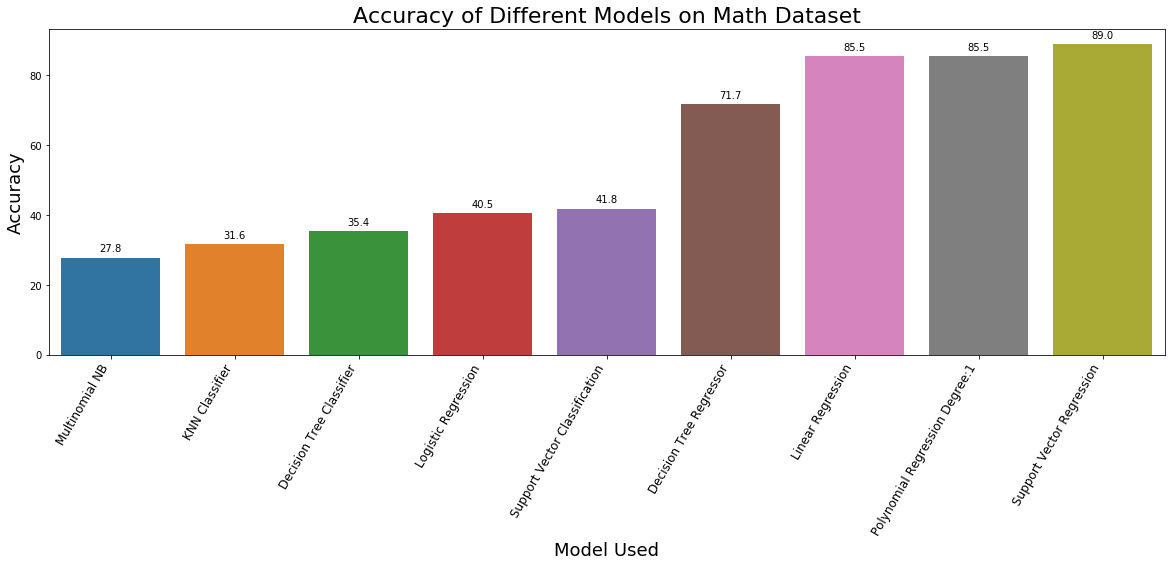

In [433]:
plt.figure(figsize=(20, 6))
splot = sns.barplot(x = "Model Used",y = "Accuracy", data = accuracies_math_df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(accuracies_math_df.index, rotation=60, horizontalalignment='right', fontsize=12)
plt.xlabel("Model Used", size=18)
plt.ylabel("Accuracy", size=18)
plt.title("Accuracy of Different Models on Math Dataset", fontdict={'size':22})

Text(0.5, 1.0, 'Accuracy of Different Models on Portuguese Dataset')

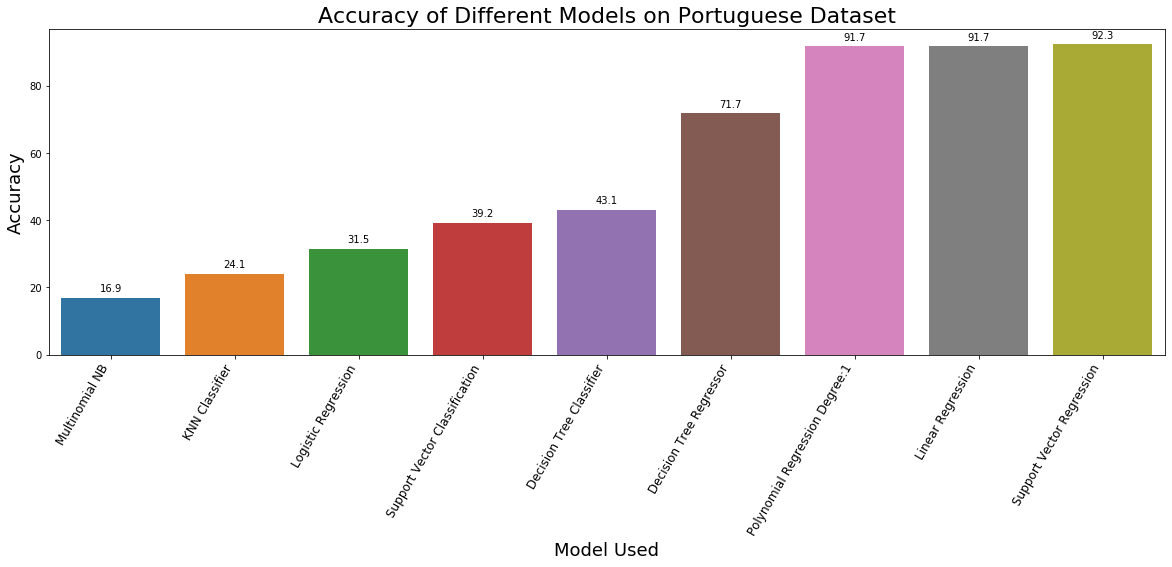

In [434]:
plt.figure(figsize=(20, 6))
splot = sns.barplot(x = "Model Used",y = "Accuracy", data = accuracies_port_df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(accuracies_port_df.index, rotation=60, horizontalalignment='right', fontsize=12)
plt.xlabel("Model Used", size=18)
plt.ylabel("Accuracy", size=18)
plt.title("Accuracy of Different Models on Portuguese Dataset", fontdict={'size':22})

## Inferences

### Based on the above graphs following inferences can be made
    - It is clearly visible that regression is far more suitable for this dataset than classification if the data isn't grouped.
    - For Math and Portuguese dataset, Support Vector Regression shows to be the best model.

### Now, lets look at the weightage of each feature for the regression models for both the datasets

In [435]:
linreg_port_coef_df = pd.DataFrame({"Features": list(linreg_port_coef.keys()), "Weights": list(linreg_port_coef.values())})
linreg_math_coef_df = pd.DataFrame({"Features": list(linreg_math_coef.keys()), "Weights": list(linreg_math_coef.values())})

linreg_port_coef_df['colors'] = ['red' if x < 0 else 'green' for x in linreg_port_coef_df['Weights']]
linreg_math_coef_df['colors'] = ['red' if x < 0 else 'green' for x in linreg_math_coef_df['Weights']]

In [436]:
linreg_port_coef_df.sort_values('Weights', inplace=True)
linreg_port_coef_df.reset_index(inplace=True)
linreg_math_coef_df.sort_values('Weights', inplace=True)
linreg_math_coef_df.reset_index(inplace=True)

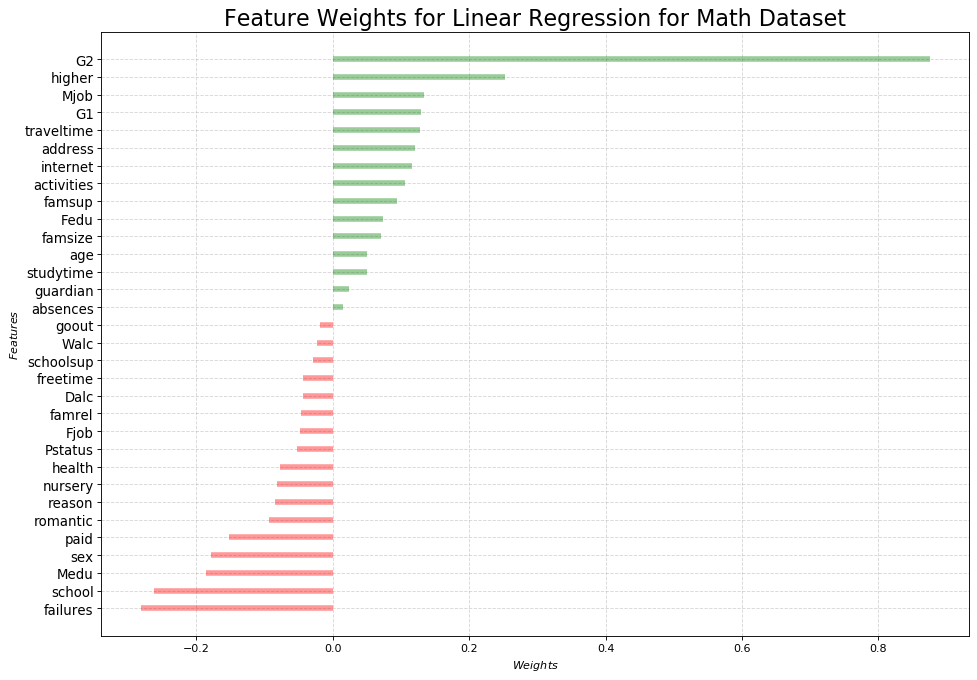

In [437]:
#Here, linear regression feature weights have been considered as the score difference between SVR and Linear Regression was negligible

plt.figure(figsize=(14,10), dpi= 80)
plt.hlines(y = linreg_port_coef_df.index, xmin=0, xmax=linreg_port_coef_df.Weights, color=linreg_port_coef_df.colors, alpha=0.4, linewidth=5)


plt.gca().set(ylabel='$Features$', xlabel='$Weights$')
plt.yticks(linreg_port_coef_df.index, linreg_port_coef_df.Features, fontsize=12)
plt.title('Feature Weights for Linear Regression for Math Dataset', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.show()

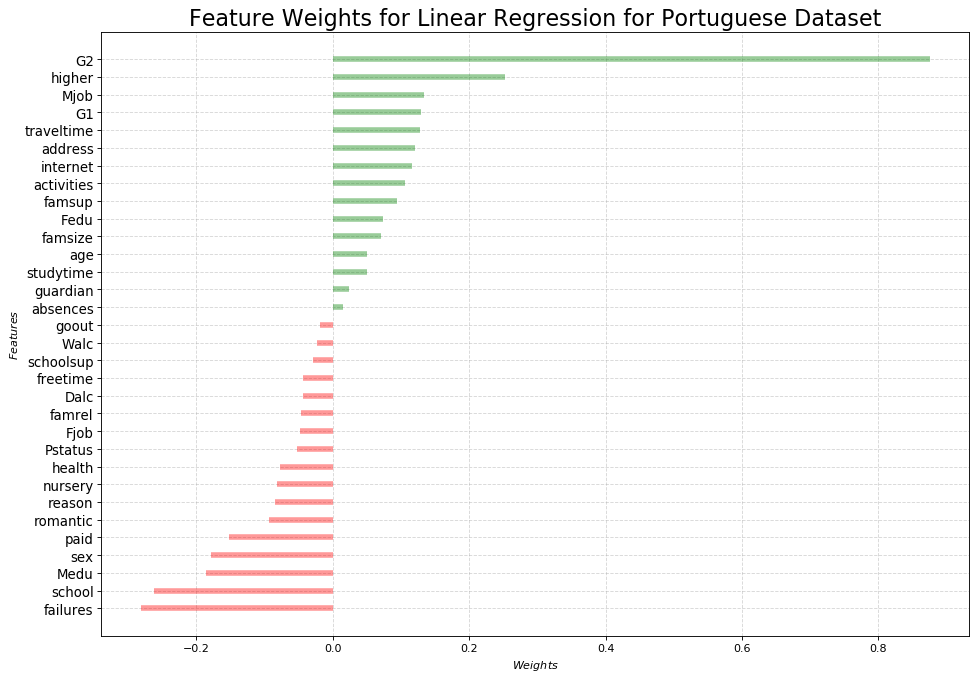

In [438]:
plt.figure(figsize=(14,10), dpi= 80)
plt.hlines(y = linreg_port_coef_df.index, xmin=0, xmax=linreg_port_coef_df.Weights, color=linreg_port_coef_df.colors, alpha=0.4, linewidth=5)


plt.gca().set(ylabel='$Features$', xlabel='$Weights$')
plt.yticks(linreg_port_coef_df.index, linreg_port_coef_df.Features, fontsize=12)
plt.title('Feature Weights for Linear Regression for Portuguese Dataset', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.show()

## Inferences

### Looking at the above graphs, following inferences can be made:
    - The wish to pursue higher education, the type of area the students live in, and their second period grades have the most positive effect on their final grade
    - Whereas, their number of failures, whether they have paid for extra classes, and their parents' cohabitation status has the most negative impact on their final grade

# Performance of Models on grouping the target variable

## Grouping of target feature

### Math Data

In [439]:
math['G3C'] = 'na'
math.loc[(math.G3 >= 16) & (math.G3 <= 20), 'G3C'] = 'excellent'
math.loc[(math.G3 >= 11) & (math.G3 <= 15), 'G3C'] = 'good'
math.loc[(math.G3 >= 6) & (math.G3 <= 10), 'G3C'] = 'fair'
math.loc[(math.G3 >= 0) & (math.G3 <= 5), 'G3C'] = 'poor'

In [440]:
math.drop('G3',axis='columns', inplace=True)

In [441]:
math.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3C'],
      dtype='object')

### Portuguese Data

In [442]:
port['G3C'] = 'na'
port.loc[(port.G3 >= 16) & (port.G3 <= 20), 'G3C'] = 'excellent'
port.loc[(port.G3 >= 11) & (port.G3 <= 15), 'G3C'] = 'good'
port.loc[(port.G3 >= 6) & (port.G3 <= 10), 'G3C'] = 'fair'
port.loc[(port.G3 >= 0) & (port.G3 <= 5), 'G3C'] = 'poor'

In [443]:
port.drop('G3',axis='columns', inplace=True)

In [444]:
port.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3C'],
      dtype='object')

## Data Encoding and Visualizations

In [445]:
#Using label encoder for conversion of object type attributes
encoded_math_grp = math.copy()
encoded_port_grp = port.copy()
replace_dict_2 = {'yes': 1, 'no':0, 'other': 0, 'at_home': 1, 'services': 2, 'health': 3, 'teacher': 4, 'excellent': 4, 'good': 3, 'fair': 2, 'poor': 1}

Text(0, 0.5, 'Number of Student')

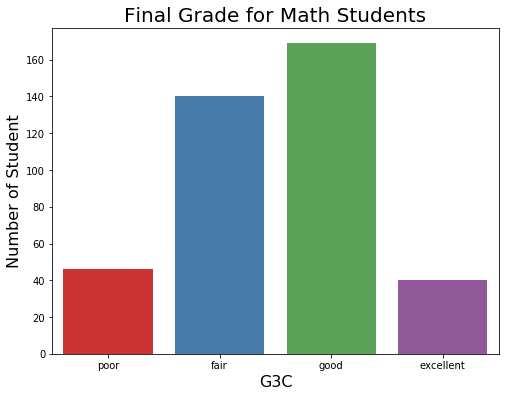

In [446]:
# Final Grade Countplot
plt.figure(figsize=(8,6))
sns.countplot(encoded_math_grp.G3C, order=["poor","fair","good", "excellent"], palette='Set1')
plt.title('Final Grade for Math Students',fontsize=20)
plt.xlabel('G3C', fontsize=16)
plt.ylabel('Number of Student', fontsize=16)

In [447]:
print("Object type attributes before encoding:\n")
for attr in encoded_math_grp.head():
    if encoded_math_grp[attr].dtype == object:
        print(f"{attr.ljust(11)}:{set(encoded_math_grp[attr])}")

#Manually encoding for uniformity across attributes
encoded_math_grp.iloc[:, 15:23] = encoded_math_grp.iloc[:, 15:23].replace(replace_dict_2).astype('int')
encoded_math_grp.iloc[:, 8:10] = encoded_math_grp.iloc[:, 8:10].replace(replace_dict_2).astype('int')
encoded_math_grp.iloc[:, -1] = encoded_math_grp.iloc[:, -1].replace(replace_dict_2).astype('int')
        
print("\n\nObject type attributes after encoding:\n")
for attr in encoded_math_grp.head():
    if encoded_math_grp[attr].dtype == object:
        encoded_math_grp[attr] = l_encoder.fit_transform(encoded_math_grp[attr])
        print(f"{attr.ljust(11)}:{set(encoded_math_grp[attr])}")



Object type attributes before encoding:

school     :{'GP', 'MS'}
sex        :{'F', 'M'}
address    :{'U', 'R'}
famsize    :{'GT3', 'LE3'}
Pstatus    :{'T', 'A'}
Mjob       :{'teacher', 'at_home', 'other', 'services', 'health'}
Fjob       :{'teacher', 'at_home', 'other', 'services', 'health'}
reason     :{'other', 'reputation', 'course', 'home'}
guardian   :{'mother', 'other', 'father'}
schoolsup  :{'yes', 'no'}
famsup     :{'no', 'yes'}
paid       :{'no', 'yes'}
activities :{'no', 'yes'}
nursery    :{'yes', 'no'}
higher     :{'yes', 'no'}
internet   :{'no', 'yes'}
romantic   :{'no', 'yes'}
G3C        :{'excellent', 'good', 'fair', 'poor'}


Object type attributes after encoding:

school     :{0, 1}
sex        :{0, 1}
address    :{0, 1}
famsize    :{0, 1}
Pstatus    :{0, 1}
reason     :{0, 1, 2, 3}
guardian   :{0, 1, 2}


Text(0, 0.5, 'Number of Student')

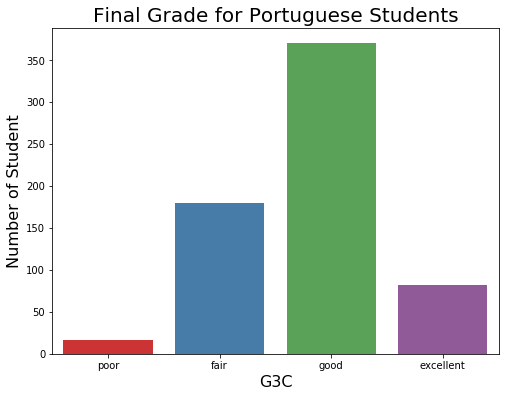

In [448]:
# Final Grade Countplot
plt.figure(figsize=(8,6))
sns.countplot(encoded_port_grp.G3C, order=["poor","fair","good", "excellent"], palette='Set1')
plt.title('Final Grade for Portuguese Students',fontsize=20)
plt.xlabel('G3C', fontsize=16)
plt.ylabel('Number of Student', fontsize=16)

In [449]:
print("Object type attributes before encoding:\n")
for attr in encoded_port_grp.head():
    if encoded_port_grp[attr].dtype == object:
        print(f"{attr.ljust(11)}:{set(encoded_port_grp[attr])}")

#Manually encoding for uniformity across attributes
encoded_port_grp.iloc[:, 15:23] = encoded_port_grp.iloc[:, 15:23].replace(replace_dict_2).astype('int')
encoded_port_grp.iloc[:, 8:10] = encoded_port_grp.iloc[:, 8:10].replace(replace_dict_2).astype('int')
encoded_port_grp.iloc[:, -1] = encoded_port_grp.iloc[:, -1].replace(replace_dict_2).astype('int')
        
print("\n\nObject type attributes after encoding:\n")
for attr in encoded_port_grp.head():
    if encoded_port_grp[attr].dtype == object:
        encoded_port_grp[attr] = l_encoder.fit_transform(encoded_port_grp[attr])
        print(f"{attr.ljust(11)}:{set(encoded_port_grp[attr])}")



Object type attributes before encoding:

school     :{'GP', 'MS'}
sex        :{'F', 'M'}
address    :{'U', 'R'}
famsize    :{'GT3', 'LE3'}
Pstatus    :{'T', 'A'}
Mjob       :{'teacher', 'at_home', 'other', 'services', 'health'}
Fjob       :{'teacher', 'at_home', 'other', 'services', 'health'}
reason     :{'other', 'reputation', 'course', 'home'}
guardian   :{'mother', 'other', 'father'}
schoolsup  :{'yes', 'no'}
famsup     :{'no', 'yes'}
paid       :{'no', 'yes'}
activities :{'no', 'yes'}
nursery    :{'yes', 'no'}
higher     :{'yes', 'no'}
internet   :{'no', 'yes'}
romantic   :{'no', 'yes'}
G3C        :{'good', 'excellent', 'fair', 'poor'}


Object type attributes after encoding:

school     :{0, 1}
sex        :{0, 1}
address    :{0, 1}
famsize    :{0, 1}
Pstatus    :{0, 1}
reason     :{0, 1, 2, 3}
guardian   :{0, 1, 2}


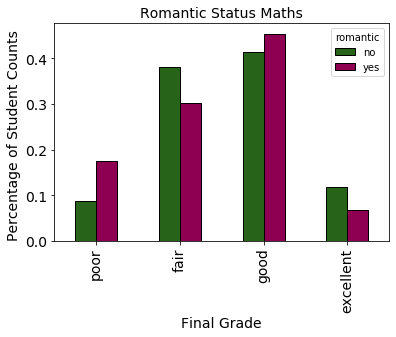

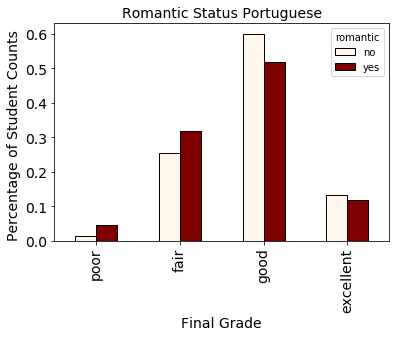

In [450]:
#relation of romantic attribute with their G3 scores
perc = (lambda col: col/col.sum())
index = ['poor','fair','good','excellent']

romance_tab1 = pd.crosstab(index=math.G3C, columns=math.romantic)
romance_perc_math = romance_tab1.apply(perc).reindex(index)
romance_perc_math.plot.bar(colormap="PiYG_r", fontsize=14,edgecolor = "black")
plt.title('Romantic Status Maths', fontsize=14)
plt.ylabel('Percentage of Student Counts ', fontsize=14)
plt.xlabel('Final Grade', fontsize=14)
plt.show()

romance_tab2 = pd.crosstab(index=port.G3C, columns=port.romantic)
romance_perc_port = romance_tab2.apply(perc).reindex(index)
romance_perc_port.plot.bar(colormap="OrRd", fontsize=14,edgecolor = "black")
plt.title('Romantic Status Portuguese', fontsize=14)
plt.ylabel('Percentage of Student Counts ', fontsize=14)
plt.xlabel('Final Grade', fontsize=14)
plt.show()

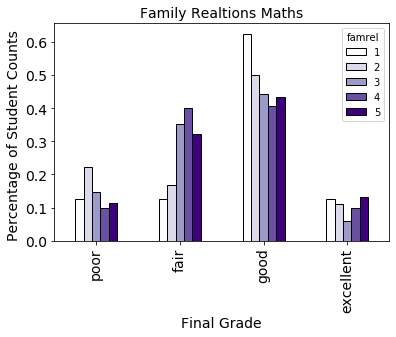

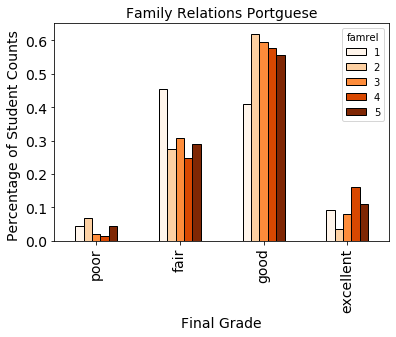

In [451]:
index = ['poor','fair','good','excellent']
perc = (lambda col: col/col.sum())
famrel_tab1 = pd.crosstab(index=math.G3C, columns=math.famrel)
famrel_math = famrel_tab1.apply(perc).reindex(index)
famrel_math.plot.bar(colormap="Purples", fontsize=14,edgecolor = "black")
plt.title('Family Realtions Maths', fontsize=14)
plt.ylabel('Percentage of Student Counts ', fontsize=14)
plt.xlabel('Final Grade', fontsize=14)
plt.show()

famrel_tab2 = pd.crosstab(index=port.G3C, columns=port.famrel)
famrel_port = famrel_tab2.apply(perc).reindex(index)
famrel_port.plot.bar(colormap="Oranges", fontsize=14,edgecolor = "black")
plt.title('Family Relations Portguese', fontsize=14)
plt.ylabel('Percentage of Student Counts ', fontsize=14)
plt.xlabel('Final Grade', fontsize=14)
plt.show()

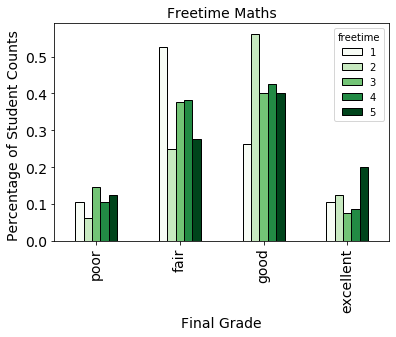

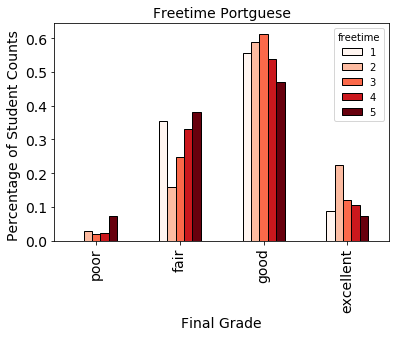

In [452]:
index = ['poor','fair','good','excellent']
perc = (lambda col: col/col.sum())

freetime_tab1 = pd.crosstab(index=math.G3C, columns=math.freetime)
freetime_math = freetime_tab1.apply(perc).reindex(index)
freetime_math.plot.bar(colormap="Greens", fontsize=14,edgecolor = "black")
plt.title('Freetime Maths', fontsize=14)
plt.ylabel('Percentage of Student Counts ', fontsize=14)
plt.xlabel('Final Grade', fontsize=14)
plt.show()

freetime_tab2 = pd.crosstab(index=port.G3C, columns=port.freetime)
freetime_port = freetime_tab2.apply(perc).reindex(index)
freetime_port.plot.bar(colormap="Reds", fontsize=14,edgecolor = "black")
plt.title('Freetime Portguese', fontsize=14)
plt.ylabel('Percentage of Student Counts ', fontsize=14)
plt.xlabel('Final Grade', fontsize=14)
plt.show()

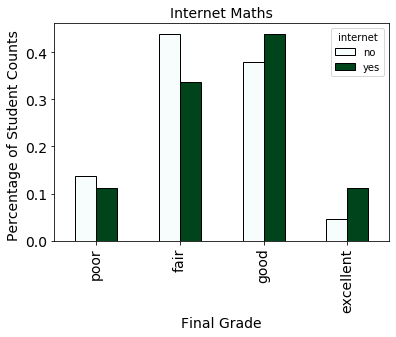

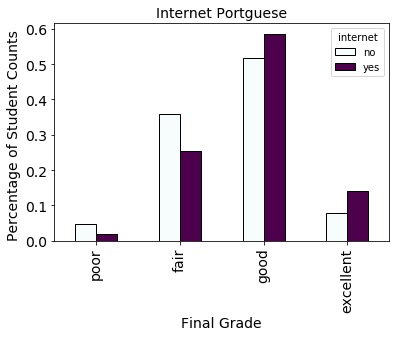

In [453]:
index = ['poor','fair','good','excellent']
perc = (lambda col: col/col.sum())

internet_tab1 = pd.crosstab(index=math.G3C, columns=math.internet)
internet_math = internet_tab1.apply(perc).reindex(index)
internet_math.plot.bar(colormap="BuGn", fontsize=14,edgecolor = "black")
plt.title('Internet Maths', fontsize=14)
plt.ylabel('Percentage of Student Counts ', fontsize=14)
plt.xlabel('Final Grade', fontsize=14)
plt.show()

internet_tab2 = pd.crosstab(index=port.G3C, columns=port.internet)
internet_port = internet_tab2.apply(perc).reindex(index)
internet_port.plot.bar(colormap="BuPu", fontsize=14,edgecolor = "black")
plt.title('Internet Portguese', fontsize=14)
plt.ylabel('Percentage of Student Counts ', fontsize=14)
plt.xlabel('Final Grade', fontsize=14)
plt.show()

In [454]:
X_math = encoded_math_grp.iloc[:, :-1]
y_math = encoded_math_grp.iloc[:, -1]
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_math, y_math, test_size = 0.2)

In [455]:
X_port = encoded_port_grp.iloc[:, :-1]
y_port = encoded_port_grp.iloc[:, -1]
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_port, y_port, test_size = 0.2)

In [456]:
accuracies_math_grp = {}
accuracies_port_grp = {}

## Decision Tree Classifier

### Math Data

In [457]:
params = {'criterion':['gini', 'entropy'], 'splitter':['best', 'random']}

grid = GridSearchCV(DecisionTreeClassifier(), params)
grid.fit(X_train_m, y_train_m)
print("The best parameters for Decision Tree Classification:")
grid.best_params_

The best parameters for Decision Tree Classification:


{'criterion': 'entropy', 'splitter': 'best'}

In [458]:
clsf = DecisionTreeClassifier(criterion = grid.best_params_['criterion'], splitter = grid.best_params_['splitter'], max_depth=5)

clsf = clsf.fit(X_train_m, y_train_m)

In [459]:
y_pred = clsf.predict(X_test_m)
print("Accuracy Score:", metrics.accuracy_score(y_test_m, y_pred))
accuracies_math_grp["Decision Tree Classifier"] = metrics.accuracy_score(y_test_m, y_pred)
print("Cross Validation Score:", cross_val_score(clsf, X_train_m, y_train_m).mean())

Accuracy Score: 0.8354430379746836
Cross Validation Score: 0.7497519841269842


### Portuguese Data

In [460]:
params = {'criterion':['gini', 'entropy'], 'splitter':['best', 'random']}

grid = GridSearchCV(DecisionTreeClassifier(), params)
grid.fit(X_train_p, y_train_p)
print("The best parameters for Decision Tree Classification:")
grid.best_params_

The best parameters for Decision Tree Classification:


{'criterion': 'entropy', 'splitter': 'random'}

In [461]:
clsf = DecisionTreeClassifier(criterion = grid.best_params_['criterion'], splitter = grid.best_params_['splitter'],max_depth=5)

clsf = clsf.fit(X_train_p, y_train_p)

In [462]:
y_pred = clsf.predict(X_test_p)
print("Accuracy Score:", metrics.accuracy_score(y_test_p, y_pred))
accuracies_port_grp["Decision Tree Classifier"] = metrics.accuracy_score(y_test_p, y_pred)
print("Cross Validation Score:", cross_val_score(clsf, X_train_p, y_train_p).mean())

Accuracy Score: 0.6923076923076923
Cross Validation Score: 0.8015496639283046


## KNN Classifier

### Math Data

In [489]:
knn_params = {'n_neighbors': [i for i in range(3, 16, 2)], 'weights': ['uniform', 'distance']}
grid = GridSearchCV(neighbors.KNeighborsClassifier(), knn_params)
grid.fit(X_train_m, y_train_m)
print("The best parameters for KNN Classification:")
grid.best_params_

The best parameters for KNN Classification:


{'n_neighbors': 15, 'weights': 'distance'}

In [490]:
knn_math = neighbors.KNeighborsClassifier(weights = grid.best_params_['weights'], n_neighbors = grid.best_params_['n_neighbors'])
knn_math.fit(X_train_m, y_train_m)
print("Accuracy Score:", knn_math.score(X_test_m, y_test_m))
print("Cross Validation Score:", cross_val_score(knn_math, X_train_m, y_train_m).mean())
accuracies_math_grp["KNN Classifier"] = knn_math.score(X_test_m, y_test_m)

Accuracy Score: 0.8987341772151899
Cross Validation Score: 0.7817460317460317


### Portuguese Data

In [492]:
knn_params = {'n_neighbors': [i for i in range(3, 16, 2)], 'weights': ['uniform', 'distance']}
grid = GridSearchCV(neighbors.KNeighborsClassifier(), knn_params)
grid.fit(X_train_p, y_train_p)
print("The best parameters for KNN Classification:")
grid.best_params_

The best parameters for KNN Classification:


{'n_neighbors': 13, 'weights': 'uniform'}

In [493]:
knn_port = neighbors.KNeighborsClassifier(weights = grid.best_params_['weights'], n_neighbors = grid.best_params_['n_neighbors'])
knn_port.fit(X_train_p, y_train_p)
print("Accuracy Score:", knn_port.score(X_test_p, y_test_p))
print("Cross Validation Score:", cross_val_score(knn_port, X_train_p, y_train_p).mean())
accuracies_port_grp["KNN Classifier"] = knn_port.score(X_test_m, y_test_m)

Accuracy Score: 0.7615384615384615
Cross Validation Score: 0.8149925317401046


## Support Vector Classification

### Math Data

In [467]:
from sklearn.svm import SVC, SVR

kernels = ['linear', 'rbf', 'poly', 'sigmoid']
print("Accuracy for each kernel:\n")
for kern in kernels:
    model = SVC(kernel = kern, C = 1)
    model.fit(X_train_m, y_train_m)
    print(f"Kernel: {kern}")
    print(f"Accuracy: {model.score(X_test_m, y_test_m)}\n")

Accuracy for each kernel:

Kernel: linear
Accuracy: 0.8354430379746836

Kernel: rbf
Accuracy: 0.8607594936708861

Kernel: poly
Accuracy: 0.8860759493670886

Kernel: sigmoid
Accuracy: 0.569620253164557



In [468]:
print("Polynomial Kernel")
for i in range(1, 6):
    model = SVC(kernel = 'poly', degree = i, C = 100)
    model.fit(X_train_m, y_train_m)
    print(f'Degree: {i}')
    print(f'Accuracy (Test Data): {model.score(X_test_m, y_test_m)}')
    print(f'Accuracy (Train Data): {model.score(X_train_m, y_train_m)}\n')

Polynomial Kernel
Degree: 1
Accuracy (Test Data): 0.8987341772151899
Accuracy (Train Data): 0.8829113924050633

Degree: 2
Accuracy (Test Data): 0.8987341772151899
Accuracy (Train Data): 0.9525316455696202

Degree: 3
Accuracy (Test Data): 0.8481012658227848
Accuracy (Train Data): 0.9873417721518988

Degree: 4
Accuracy (Test Data): 0.8354430379746836
Accuracy (Train Data): 0.9968354430379747

Degree: 5
Accuracy (Test Data): 0.8227848101265823
Accuracy (Train Data): 0.9968354430379747



In [469]:
param_grid = {'C':[0.1, 1, 100], 'kernel':['rbf', 'poly', 'sigmoid', 'linear'], 'degree':[1, 2, 3, 4, 5, 6]}

grid = GridSearchCV(SVC(), param_grid)
grid.fit(X_train_m, y_train_m)

print("Result of grid search:")
print(grid.best_params_)
print(f"Accuracy of selected kernel: {grid.score(X_test_m, y_test_m)}")
print(f"\nThe kernel that works best for the SVM classification of this dataset is: {grid.best_params_['kernel']}")

Result of grid search:
{'C': 1, 'degree': 3, 'kernel': 'poly'}
Accuracy of selected kernel: 0.8860759493670886

The kernel that works best for the SVM classification of this dataset is: poly


In [470]:
model = SVC(kernel = grid.best_params_['kernel'], degree = grid.best_params_['degree'], C = grid.best_params_['C'])
model.fit(X_train_m, y_train_m)
print(f'Accuracy (Test Data): {model.score(X_test_m, y_test_m)}')
print(f'Accuracy (Train Data): {model.score(X_train_m, y_train_m)}')
accuracies_math_grp["Support Vector Classification"] = model.score(X_test_m, y_test_m)
print("Cross Validation Score:", cross_val_score(model, X_train_m, y_train_m).mean())

Accuracy (Test Data): 0.8860759493670886
Accuracy (Train Data): 0.8227848101265823
Cross Validation Score: 0.7880456349206348


### Portuguese Data

In [471]:
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
print("Accuracy for each kernel:\n")
for kern in kernels:
    model = SVC(kernel = kern, C = 1)
    model.fit(X_train_p, y_train_p)
    print(f"Kernel: {kern}")
    print(f"Accuracy: {model.score(X_test_p, y_test_p)}\n")

Accuracy for each kernel:

Kernel: linear
Accuracy: 0.7769230769230769

Kernel: rbf
Accuracy: 0.7461538461538462

Kernel: poly
Accuracy: 0.7384615384615385

Kernel: sigmoid
Accuracy: 0.5538461538461539



In [472]:
print("Polynomial Kernel")
for i in range(1, 6):
    model = SVC(kernel = 'poly', degree = i, C = 100)
    model.fit(X_train_p, y_train_p)
    print(f'Degree: {i}')
    print(f'Accuracy (Test Data): {model.score(X_test_p, y_test_p)}')
    print(f'Accuracy (Train Data): {model.score(X_train_p, y_train_p)}\n')

Polynomial Kernel
Degree: 1
Accuracy (Test Data): 0.7846153846153846
Accuracy (Train Data): 0.9113680154142582

Degree: 2
Accuracy (Test Data): 0.7923076923076923
Accuracy (Train Data): 0.9325626204238922

Degree: 3
Accuracy (Test Data): 0.7615384615384615
Accuracy (Train Data): 0.9614643545279383

Degree: 4
Accuracy (Test Data): 0.7384615384615385
Accuracy (Train Data): 0.9845857418111753

Degree: 5
Accuracy (Test Data): 0.7461538461538462
Accuracy (Train Data): 0.9961464354527938



In [473]:
param_grid = {'C':[0.1, 1, 100], 'kernel':['rbf', 'poly', 'sigmoid', 'linear'], 'degree':[1, 2, 3, 4, 5, 6]}

grid = GridSearchCV(SVC(), param_grid)
grid.fit(X_train_p, y_train_p)

print("Result of grid search:")
print(grid.best_params_)
print(f"Accuracy of selected kernel: {grid.score(X_test_p, y_test_p)}")
print(f"\nThe kernel that works best for the SVM classification of this dataset is: {grid.best_params_['kernel']}")

Result of grid search:
{'C': 1, 'degree': 2, 'kernel': 'poly'}
Accuracy of selected kernel: 0.7461538461538462

The kernel that works best for the SVM classification of this dataset is: poly


In [474]:
model = SVC(kernel = grid.best_params_['kernel'], degree = grid.best_params_['degree'], C = grid.best_params_['C'])
model.fit(X_train_p, y_train_p)
print(f'Accuracy (Test Data): {model.score(X_test_p, y_test_p)}')
print(f'Accuracy (Train Data): {model.score(X_train_p, y_train_p)}')
accuracies_port_grp["Support Vector Classification"] = model.score(X_test_p, y_test_p)
print("Cross Validation Score:", cross_val_score(model, X_train_p, y_train_p).mean())

Accuracy (Test Data): 0.7461538461538462
Accuracy (Train Data): 0.8901734104046243
Cross Validation Score: 0.8593726661687825


## Naive-Bayes


In [475]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer

In [476]:
nb_ml = MultinomialNB()
nb_ml.fit(X_train_m, y_train_m)
y_pred_class_ml = nb_ml.predict(X_test_m)
print(f"\nAccuracy Score: {metrics.accuracy_score(y_test_m,y_pred_class_ml)}\n")
accuracies_math_grp["MultinomialNB"] = metrics.accuracy_score(y_test_m,y_pred_class_ml)
print("Cross Validation Score:", cross_val_score(nb_ml, X_train_m, y_train_m).mean())


Accuracy Score: 0.620253164556962

Cross Validation Score: 0.6046626984126984


In [477]:
nb_br = BernoulliNB()
nb_br.fit(X_train_m,y_train_m)
y_pred_class_br = nb_br.predict(X_test_m)
print(f"\nAccuracy Score: {metrics.accuracy_score(y_test_m,y_pred_class_br)}\n")
accuracies_math_grp["BernoulliNB"] = metrics.accuracy_score(y_test_m,y_pred_class_br)
print("Cross Validation Score:", cross_val_score(nb_br, X_train_m, y_train_m).mean())


Accuracy Score: 0.4936708860759494

Cross Validation Score: 0.5256448412698412


In [478]:
nb_gs = GaussianNB()
nb_gs.fit(X_train_m,y_train_m)
y_pred_class_gs = nb_gs.predict(X_test_m)
print(f"\nAccuracy Score: {metrics.accuracy_score(y_test_m,y_pred_class_gs)}\n")
accuracies_math_grp["GaussianNB"] = metrics.accuracy_score(y_test_m,y_pred_class_gs)
print("Cross Validation Score:", cross_val_score(nb_gs, X_train_m, y_train_m).mean())


Accuracy Score: 0.6455696202531646

Cross Validation Score: 0.6012400793650794


### Portuguese Data

In [479]:
nb_ml = MultinomialNB()
nb_ml.fit(X_train_p, y_train_p)
y_pred_class_ml = nb_ml.predict(X_test_p)
print(f"\nAccuracy Score: {metrics.accuracy_score(y_test_p,y_pred_class_ml)}\n")
accuracies_port_grp["MultinomialNB"] = metrics.accuracy_score(y_test_p,y_pred_class_ml)
print("Cross Validation Score:", cross_val_score(nb_ml, X_train_p, y_train_p).mean())


Accuracy Score: 0.6692307692307692

Cross Validation Score: 0.7071508588498879


In [480]:
nb_br = BernoulliNB()
nb_br.fit(X_train_p,y_train_p)
y_pred_class_br = nb_br.predict(X_test_p)
print(f"\nAccuracy Score: {metrics.accuracy_score(y_test_p,y_pred_class_br)}\n")
accuracies_port_grp["BernoulliNB"] = metrics.accuracy_score(y_test_p,y_pred_class_br)
print("Cross Validation Score:", cross_val_score(nb_br, X_train_p, y_train_p).mean())


Accuracy Score: 0.6076923076923076

Cross Validation Score: 0.6704817027632561


In [481]:
nb_gs = GaussianNB()
nb_gs.fit(X_train_p,y_train_p)
y_pred_class_gs = nb_gs.predict(X_test_p)
print(f"\nAccuracy Score: {metrics.accuracy_score(y_test_p,y_pred_class_gs)}\n")
accuracies_port_grp["GaussianNB"] = metrics.accuracy_score(y_test_p,y_pred_class_gs)
print("Cross Validation Score:", cross_val_score(nb_br, X_train_p, y_train_p).mean())


Accuracy Score: 0.45384615384615384

Cross Validation Score: 0.6704817027632561


## SGD classifier

### Math data

In [482]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sf = sgd.fit(X_train_m, y_train_m)
y_pred_class_sgd = sf.predict(X_test_m)
print(f"\nAccuracy Score: {metrics.accuracy_score(y_test_m,y_pred_class_sgd)}\n")
print("Stochastic Gradient Descent Model Score" , ":" , sf.score(X_train_m, y_train_m) , "," ,
      "Cross Validation Score" ,":" , sf.score(X_test_m, y_test_m))
accuracies_math_grp["SGD Classifier"] = metrics.accuracy_score(y_test_m,y_pred_class_sgd)
print("Cross Validation Score:", cross_val_score(sgd, X_train_m, y_train_m).mean())


Accuracy Score: 0.6455696202531646

Stochastic Gradient Descent Model Score : 0.6613924050632911 , Cross Validation Score : 0.6455696202531646
Cross Validation Score: 0.636061507936508


### Portuguese Data

In [483]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sf = sgd.fit(X_train_p, y_train_p)
y_pred_class_sgd = sf.predict(X_test_p)
print(f"\nAccuracy Score: {metrics.accuracy_score(y_test_p,y_pred_class_sgd)}\n")
print("Stochastic Gradient Descent Model Score" , ":" , sf.score(X_train_p, y_train_p) , "," ,
      "Cross Validation Score" ,":" , sf.score(X_test_p, y_test_p))
accuracies_port_grp["SGD Classifier"] = metrics.accuracy_score(y_test_p,y_pred_class_sgd)
print("Cross Validation Score:", cross_val_score(sgd, X_train_p, y_train_p).mean())


Accuracy Score: 0.676923076923077

Stochastic Gradient Descent Model Score : 0.766859344894027 , Cross Validation Score : 0.676923076923077
Cross Validation Score: 0.7089619118745333


# Analysis

## Comparison between different models

In [494]:
accuracies_math_grp_df = pd.DataFrame({"Model Used": list(accuracies_math_grp.keys()), "Accuracy": [i*100 for i in list(accuracies_math_grp.values())]})
accuracies_port_grp_df = pd.DataFrame({"Model Used": list(accuracies_port_grp.keys()), "Accuracy": [i*100 for i in list(accuracies_port_grp.values())]})

In [495]:
accuracies_math_grp_df.sort_values('Accuracy', inplace=True)
accuracies_math_grp_df.reset_index(inplace=True)
accuracies_port_grp_df.sort_values('Accuracy', inplace=True)
accuracies_port_grp_df.reset_index(inplace=True)

Text(0.5, 1.0, 'Accuracy of Different Models on Math Dataset')

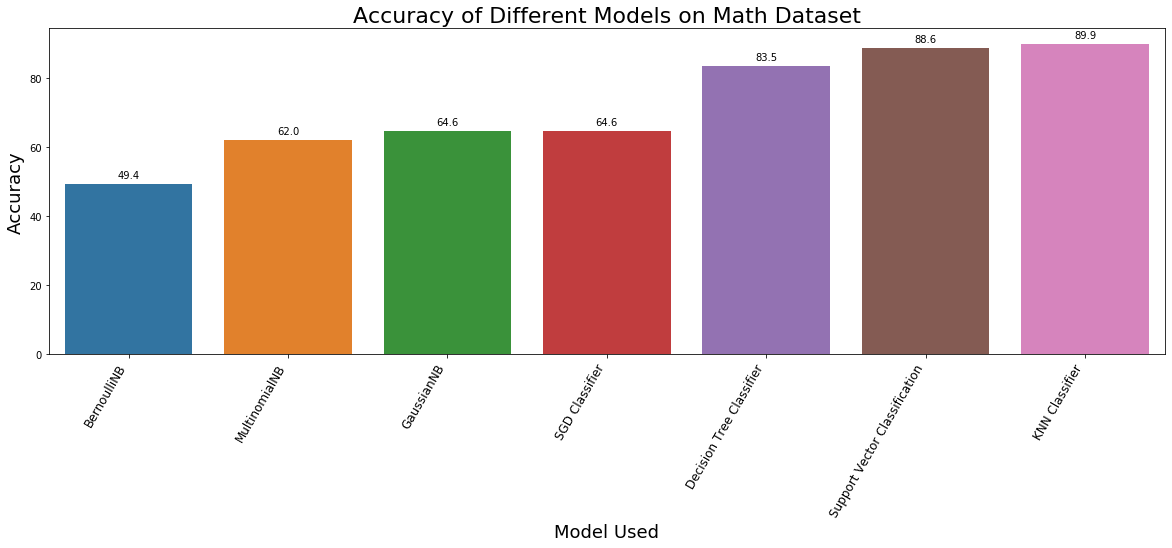

In [496]:
plt.figure(figsize=(20, 6))
splot = sns.barplot(x = "Model Used",y = "Accuracy", data = accuracies_math_grp_df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(accuracies_math_grp_df.index, rotation=60, horizontalalignment='right', fontsize=12)
plt.xlabel("Model Used", size=18)
plt.ylabel("Accuracy", size=18)
plt.title("Accuracy of Different Models on Math Dataset", fontdict={'size':22})

Text(0.5, 1.0, 'Accuracy of Different Models on Portuguese Dataset')

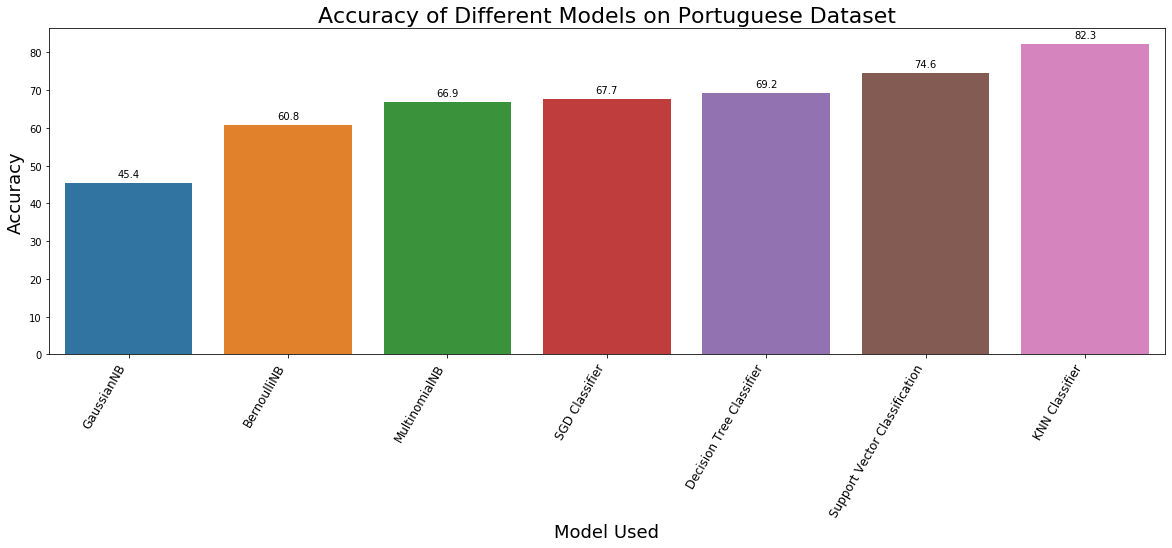

In [497]:
plt.figure(figsize=(20, 6))
splot = sns.barplot(x = "Model Used",y = "Accuracy", data = accuracies_port_grp_df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(accuracies_port_grp_df.index, rotation=60, horizontalalignment='right', fontsize=12)
plt.xlabel("Model Used", size=18)
plt.ylabel("Accuracy", size=18)
plt.title("Accuracy of Different Models on Portuguese Dataset", fontdict={'size':22})

## Inferences

### Looking at the above graphs following inferences can be made:
    - Grouping the target variable decreases the prediction accuracy of the models.
    - KNN Classifier is the best model for Math dataset on grouping.
    - KNN Classifier is the best model for Portuguese dataset on grouping.

# Conclusion

## The prediction of a student's grade can be best done using regression techniques.
## A student's grade majorly depends on the following factors:
    - Availibility of internet at home(Positive effect)
    - Involvement in romantic relationships(Negative effect)
    - Wish to pursue higher education(Positive effect)
    - Their second period grades(Positive effect)
    - Their previous number of failures(Negative effect)
    - Whether they have paid for extra courses(Negative effect)
    
## So, a student with internet connection, positive family relations, good previous scores, and with an aim to pursue higher education is likely to perform better.